<a href="https://colab.research.google.com/github/sijieli0801/MachineLearning/blob/main/3_Feature_Engineering_%26_Baseline_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries and Data Sets

In [ ]:
from google.colab import drive
drive.mount('/drive')
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
dta = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/CleanedClusteredDta.csv')
plan = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/df_PLAN.csv')
med = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/df_MED.csv')
exam = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/df_EXAM.csv')
ros = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/df_ROS.csv')
immune = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/df_immune.csv')

In [ ]:
dta.head()

,code,index,PATIENT_NUM,ADMIT_DATE,DISCH_DATE,GENDER,VISIT_TYPE,AGE,FAMILY_HYPERTENSION_NUM,HYPERTENSION_VISIT,...,RESPIRATION_DESCRIPTION,PULSEOXYGEN,PULSEOXYGEN_DESCRIPTION,BMI,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,HOS_PERIOD,cluster
0,1166192,0,1166159,1996-03-18,1996-03-18,1,6.0,75.0,1,0,...,NaN,NaN,NaN,NaN,1,1,0,0,0,1
1,1166525,1,1166159,1996-03-19,1996-03-19,1,98.0,75.0,1,0,...,NaN,NaN,NaN,NaN,1,1,0,0,0,1
2,1166543,2,1166159,1996-03-25,1996-03-25,1,6.0,75.0,1,0,...,NaN,NaN,NaN,NaN,1,1,0,0,0,1
3,1167065,3,1166159,1996-03-18,1996-03-18,1,96.0,75.0,1,1,...,NaN,NaN,NaN,NaN,1,1,0,0,0,1
4,1167480,4,1166159,1996-03-25,1996-03-25,1,96.0,75.0,1,0,...,NaN,NaN,NaN,NaN,1,1,0,0,0,1


In [ ]:
dta.shape

(57717, 31)

In [ ]:
dta.columns

Index(['code', 'index', 'PATIENT_NUM', 'ADMIT_DATE', 'DISCH_DATE', 'GENDER',
       'VISIT_TYPE', 'AGE', 'FAMILY_HYPERTENSION_NUM', 'HYPERTENSION_VISIT',
       'HYPERTENSION_SEVERITY', 'HYPERTENSION_STATUS', 'DIASTOLIC_BP',
       'SYSTOLIC_BP', 'WEIGHT', 'HEIGHT', 'TEMPERATURE', 'PULSE',
       'PULSE_DESCRIPTION', 'BP_CUFF_SIZE', 'RESPIRATION',
       'RESPIRATION_DESCRIPTION', 'PULSEOXYGEN', 'PULSEOXYGEN_DESCRIPTION',
       'BMI', 'NON_SMOKER', 'NON_DRINKER', 'REGULAR_EXERCISER', 'NON_ALLERGY',
       'HOS_PERIOD', 'cluster'],
      dtype='object')

# Feature Engineering

## Code

In [ ]:
dta['code'].describe()

count    5.771700e+04
mean     2.140169e+07
std      1.020444e+07
min      8.340200e+04
25%      1.349252e+07
50%      2.618283e+07
75%      2.948106e+07
max      3.292484e+07
Name: code, dtype: float64

In [ ]:
len(dta[dta['code'].isnull()])

0

In [ ]:
dta['code'] = dta['code'].astype('int')

## VISIT (Index)

In [ ]:
dta['index'].describe()

count    57717.000000
mean       133.651247
std        110.485456
min          0.000000
25%         52.000000
50%        108.000000
75%        187.000000
max        784.000000
Name: index, dtype: float64

In [ ]:
len(dta[dta['index'].isnull()])

0

In [ ]:
dta['VISIT'] = dta['index']
dta.drop('index', axis = 1, inplace = True)

In [ ]:
dta['VISIT'] = dta['VISIT'].astype('int')

## PATIENT_NUM

In [ ]:
dta['PATIENT_NUM'].describe()

count    5.771700e+04
mean     5.027434e+06
std      5.396296e+06
min      1.091000e+03
25%      1.991881e+06
50%      4.184366e+06
75%      5.596852e+06
max      3.210924e+07
Name: PATIENT_NUM, dtype: float64

In [ ]:
len(dta[dta['PATIENT_NUM'].isnull()])

0

In [ ]:
dta['PATIENT_NUM'] = dta['PATIENT_NUM'].astype('int')

## DAYS (AMIT_DATE)

In [ ]:
dta['ADMIT_DATE'].describe()

count          57717
unique          5953
top       2006-04-13
freq             237
Name: ADMIT_DATE, dtype: object

In [ ]:
len(dta[dta['ADMIT_DATE'].isnull()])

0

In [ ]:
dta['ADMIT_DATE'] = pd.to_datetime(dta['ADMIT_DATE'])

In [ ]:
dta['DAYS'] = dta['ADMIT_DATE'] - dta.merge(dta.groupby('PATIENT_NUM')['ADMIT_DATE'].min(), on = 'PATIENT_NUM', how = 'left')['ADMIT_DATE_y']

In [ ]:
dta['DAYS'] = dta['DAYS'].dt.days

## STAY (DISCH_DATE)

In [ ]:
dta['DISCH_DATE'].describe()

count          57717
unique          5947
top       2006-04-13
freq             237
Name: DISCH_DATE, dtype: object

In [ ]:
len(dta[dta['DISCH_DATE'].isnull()])

0

In [ ]:
dta.drop(['ADMIT_DATE', 'DISCH_DATE'], axis =1, inplace = True)

## GENDER

In [ ]:
dta['GENDER'].describe()

count    57717.000000
mean         1.439420
std          0.496321
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: GENDER, dtype: float64

In [ ]:
len(dta[dta['GENDER'].isnull()])

0

In [ ]:
dta['GENDER'] = dta['GENDER'].astype('int')

## VISIT_TYPE (Replace Null with 0)

In [ ]:
dta['VISIT_TYPE'].describe()

count    57710.000000
mean        34.515890
std         54.708401
min          1.000000
25%          6.000000
50%          8.000000
75%         22.000000
max        201.000000
Name: VISIT_TYPE, dtype: float64

In [ ]:
len(dta[dta['VISIT_TYPE'].isnull()])

7

In [ ]:
dta['VISIT_TYPE'] = dta['VISIT_TYPE'].fillna(0)

In [ ]:
dta['VISIT_TYPE'] = dta['VISIT_TYPE'].astype('int')

## AGE

In [ ]:
dta['AGE'].describe() 

count    57717.000000
mean        72.534435
std         13.557357
min         20.000000
25%         60.000000
50%         75.000000
75%         80.000000
max        100.000000
Name: AGE, dtype: float64

In [ ]:
len(dta[dta['AGE'].isnull()])

0

In [ ]:
dta['AGE'] = dta['AGE'].astype('int')

## FAMILY_HYPERTENSION_NUM

In [ ]:
dta['FAMILY_HYPERTENSION_NUM'].describe()

count    57717.000000
mean         0.434257
std          1.086269
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: FAMILY_HYPERTENSION_NUM, dtype: float64

In [ ]:
len(dta[dta['FAMILY_HYPERTENSION_NUM'].isnull()])

0

In [ ]:
dta['FAMILY_HYPERTENSION_NUM'] = dta['FAMILY_HYPERTENSION_NUM'].astype('int')

## HYPERTENSION_VISIT

In [ ]:
dta['HYPERTENSION_VISIT'].describe()

count    57717.000000
mean         0.149904
std          0.356980
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: HYPERTENSION_VISIT, dtype: float64

In [ ]:
len(dta[dta['HYPERTENSION_VISIT'] == 0])

49065

In [ ]:
len(dta[dta['HYPERTENSION_VISIT'] == 1])

8652

In [ ]:
len(dta[dta['HYPERTENSION_VISIT'].isnull()])

0

In [ ]:
dta['HYPERTENSION_VISIT'] = dta['HYPERTENSION_VISIT'].astype('int')

## HYPERTENSION_SEVERITY

In [ ]:
dta['HYPERTENSION_SEVERITY'].describe()

count    57717.000000
mean         1.365733
std          0.892779
min          0.000000
25%          0.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: HYPERTENSION_SEVERITY, dtype: float64

In [ ]:
len(dta[dta['HYPERTENSION_SEVERITY'] == 0])

15056

In [ ]:
len(dta[dta['HYPERTENSION_SEVERITY'] == 1])

7747

In [ ]:
len(dta[dta['HYPERTENSION_SEVERITY'] == 2])

33663

In [ ]:
len(dta[dta['HYPERTENSION_SEVERITY'] == 3])

1251

In [ ]:
len(dta[dta['HYPERTENSION_SEVERITY'].isnull()])

0

In [ ]:
dta['HYPERTENSION_SEVERITY'] = dta['HYPERTENSION_SEVERITY'].astype('int')

In [ ]:
dta['LABELED'] = dta['HYPERTENSION_SEVERITY']

In [ ]:
dta.loc[dta['LABELED'] != 0, 'LABELED'] = 1

In [ ]:
dta.loc[dta['LABELED'] == 0, 'LABELED'] = 0

## HYPERTENSION_STATUS

In [ ]:
dta['HYPERTENSION_STATUS'].describe()

count    57717.000000
mean         1.792990
std          1.201541
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: HYPERTENSION_STATUS, dtype: float64

In [ ]:
len(dta[dta['HYPERTENSION_STATUS'] == 0])

14705

In [ ]:
len(dta[dta['HYPERTENSION_STATUS'] == 1])

4758

In [ ]:
len(dta[dta['HYPERTENSION_STATUS'] == 2])

16034

In [ ]:
len(dta[dta['HYPERTENSION_STATUS'] == 3])

22220

In [ ]:
len(dta[dta['HYPERTENSION_STATUS'].isnull()])

0

In [ ]:
dta['HYPERTENSION_STATUS'] = dta['HYPERTENSION_STATUS'].astype('int')

## PULSEOXYGEN_DESCRIPTION

In [ ]:
dta['PULSEOXYGEN_DESCRIPTION'].describe()

count        2093
unique          6
top       Right 1
freq          622
Name: PULSEOXYGEN_DESCRIPTION, dtype: object

In [ ]:
len(dta[dta['PULSEOXYGEN_DESCRIPTION'].isnull()])

55624

In [ ]:
dta[dta['PULSEOXYGEN_DESCRIPTION'].notnull()]['PULSEOXYGEN_DESCRIPTION'].value_counts()

Right 1    622
Right 2    480
Left 2     459
Left 1     452
Right 3     61
Left 3      19
Name: PULSEOXYGEN_DESCRIPTION, dtype: int64

In [ ]:
dta.drop('PULSEOXYGEN_DESCRIPTION', axis = 1, inplace = True)

## PULSE_DESCRIPTION

In [ ]:
dta['PULSE_DESCRIPTION'].describe()

count       10452
unique          6
top       Regular
freq         8983
Name: PULSE_DESCRIPTION, dtype: object

In [ ]:
len(dta[dta['PULSE_DESCRIPTION'].isnull()])

47265

In [ ]:
dta[dta['PULSE_DESCRIPTION'].notnull()]['PULSE_DESCRIPTION'].value_counts()

Regular                8983
Irregular              1001
Irregular Irregular     323
Regular Irregular       101
Unknown                  32
Thready                  12
Name: PULSE_DESCRIPTION, dtype: int64

In [ ]:
dta.drop('PULSE_DESCRIPTION', axis = 1, inplace = True)

## RESPIRATION_DESCRIPTION

In [ ]:
dta['RESPIRATION_DESCRIPTION'].describe()

count           804
unique            2
top       Unlabored
freq            787
Name: RESPIRATION_DESCRIPTION, dtype: object

In [ ]:
len(dta[dta['RESPIRATION_DESCRIPTION'].isnull()])

56913

In [ ]:
dta[dta['RESPIRATION_DESCRIPTION'].notnull()]['RESPIRATION_DESCRIPTION'].value_counts()

Unlabored    787
Labored       17
Name: RESPIRATION_DESCRIPTION, dtype: int64

In [ ]:
dta.drop('RESPIRATION_DESCRIPTION', axis = 1, inplace = True)

## NON_SMOKER

In [ ]:
dta['NON_SMOKER'].describe()

count    57717.000000
mean         0.563941
std          0.495899
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: NON_SMOKER, dtype: float64

In [ ]:
len(dta[dta['NON_SMOKER'].isnull()])

0

In [ ]:
dta['NON_SMOKER'] = dta['NON_SMOKER'].astype('int')

## NON_DRINKER

In [ ]:
dta['NON_DRINKER'].describe()

count    57717.000000
mean         0.260357
std          0.438833
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: NON_DRINKER, dtype: float64

In [ ]:
len(dta[dta['NON_DRINKER'].isnull()])

0

In [ ]:
dta['NON_DRINKER'] = dta['NON_DRINKER'].astype('int')

## REGULAR_EXERCISER

In [ ]:
dta['REGULAR_EXERCISER'].describe()

count    57717.000000
mean         0.197897
std          0.398417
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: REGULAR_EXERCISER, dtype: float64

In [ ]:
len(dta[dta['REGULAR_EXERCISER'].isnull()])

0

In [ ]:
dta['REGULAR_EXERCISER'] = dta['REGULAR_EXERCISER'].astype('int')

## NON_ALLERGY

In [ ]:
dta['NON_ALLERGY'].describe()

count    57717.000000
mean         0.099243
std          0.298990
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: NON_ALLERGY, dtype: float64

In [ ]:
len(dta[dta['NON_ALLERGY'].isnull()])

0

In [ ]:
dta['NON_ALLERGY'] = dta['NON_ALLERGY'].astype('int')

## HOS_PERIOD

In [ ]:
dta['HOS_PERIOD'].describe()

count    57717.000000
mean         0.038983
std          1.786757
min        -91.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        339.000000
Name: HOS_PERIOD, dtype: float64

In [ ]:
len(dta[dta['HOS_PERIOD'].isnull()])

0

## cluster

In [ ]:
dta['cluster'].describe()

count    57717.000000
mean         1.097129
std          1.018723
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: cluster, dtype: float64

In [ ]:
len(dta[dta['cluster'] == 0])

21491

In [ ]:
len(dta[dta['cluster'] == 1])

15056

In [ ]:
len(dta[dta['cluster'] == 2])

15243

In [ ]:
len(dta[dta['cluster'] == 3])

5927

## DIASTOLIC_BP

In [ ]:
dta['DIASTOLIC_BP'].describe()

count    13478.000000
mean        75.176064
std         11.848623
min          0.000000
25%         69.000000
50%         75.000000
75%         81.000000
max        787.000000
Name: DIASTOLIC_BP, dtype: float64

In [ ]:
len(dta[dta['DIASTOLIC_BP'].isnull()])

44239

In [ ]:
dta.loc[(dta['HYPERTENSION_VISIT'] == 0)]

,code,PATIENT_NUM,GENDER,VISIT_TYPE,AGE,FAMILY_HYPERTENSION_NUM,HYPERTENSION_VISIT,HYPERTENSION_SEVERITY,HYPERTENSION_STATUS,DIASTOLIC_BP,...,BMI,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,HOS_PERIOD,cluster,VISIT,DAYS,LABELED
0,1166192,1166159,1,6,75,1,0,0,0,NaN,...,NaN,1,1,0,0,0,1,0,0,0
1,1166525,1166159,1,98,75,1,0,0,0,NaN,...,NaN,1,1,0,0,0,1,1,1,0
2,1166543,1166159,1,6,75,1,0,0,0,NaN,...,NaN,1,1,0,0,0,1,2,7,0
4,1167480,1166159,1,96,75,1,0,0,0,NaN,...,NaN,1,1,0,0,0,1,4,7,0
5,1167540,1166159,1,96,75,1,0,0,0,NaN,...,NaN,1,1,0,0,0,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57712,31790336,5009829,1,8,100,0,0,2,3,NaN,...,NaN,1,0,0,0,0,0,242,7510,1
57713,31846984,5009829,1,120,100,0,0,2,3,NaN,...,NaN,1,0,0,0,0,0,243,7540,1
57714,31954761,5009829,1,13,100,0,0,2,3,NaN,...,NaN,1,0,0,0,0,0,244,7601,1
57715,32302928,5009829,1,13,100,0,0,2,3,NaN,...,NaN,1,0,0,0,0,0,245,7769,1


In [ ]:
dta.loc[(dta['HYPERTENSION_SEVERITY'] == 0) & (dta['DIASTOLIC_BP'].notnull())]

,code,PATIENT_NUM,GENDER,VISIT_TYPE,AGE,FAMILY_HYPERTENSION_NUM,HYPERTENSION_VISIT,HYPERTENSION_SEVERITY,HYPERTENSION_STATUS,DIASTOLIC_BP,...,BMI,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,HOS_PERIOD,cluster,VISIT,DAYS,LABELED
8,1168513,1166159,1,2,75,1,1,0,0,92.0,...,NaN,1,1,0,0,0,1,8,527,0
21,1169518,1166159,1,8,80,1,0,0,0,70.0,...,NaN,1,1,0,0,0,1,21,870,0
24,1169720,1166159,1,6,80,1,0,0,0,94.0,...,NaN,1,1,0,0,0,1,24,934,0
29,1170336,1166159,1,6,80,1,1,0,0,86.0,...,NaN,1,1,0,0,0,1,29,1165,0
34,1170680,1166159,1,6,80,1,1,0,0,80.0,...,NaN,1,1,0,0,0,1,34,1200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57277,31087846,5355212,1,6,85,0,0,0,0,66.0,...,NaN,0,1,0,0,0,1,212,6755,0
57280,31107999,5355212,1,6,85,0,0,0,0,60.0,...,NaN,0,1,0,0,0,1,215,6764,0
57283,31135555,5355212,1,6,85,0,0,0,0,59.0,...,NaN,0,1,0,0,0,1,218,6778,0
57286,31155552,5355212,1,11,85,0,0,0,0,65.0,...,NaN,0,1,0,0,0,1,221,6789,0


In [ ]:
dta.loc[(dta['HYPERTENSION_VISIT'] == 1) & (dta['SYSTOLIC_BP'].isnull())]

,code,PATIENT_NUM,GENDER,VISIT_TYPE,AGE,FAMILY_HYPERTENSION_NUM,HYPERTENSION_VISIT,HYPERTENSION_SEVERITY,HYPERTENSION_STATUS,DIASTOLIC_BP,...,BMI,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,HOS_PERIOD,cluster,VISIT,DAYS,LABELED
3,1167065,1166159,1,96,75,1,1,0,0,NaN,...,NaN,1,1,0,0,0,1,3,0,0
6,1167600,1166159,1,7,75,1,1,0,0,NaN,...,NaN,1,1,0,0,0,1,6,344,0
27,1169922,1166159,1,2,80,1,1,0,0,NaN,...,NaN,1,1,0,0,0,1,27,1151,0
36,1170841,1166159,1,6,80,1,1,0,0,NaN,...,NaN,1,1,0,0,0,1,36,1235,0
38,1170919,1166159,1,6,80,1,1,0,0,NaN,...,NaN,1,1,0,0,0,1,38,1270,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57673,28247320,5009829,1,8,90,0,1,2,3,NaN,...,NaN,1,0,0,0,0,0,203,5768,1
57677,28352014,5009829,1,7,90,0,1,2,3,NaN,...,NaN,1,0,0,0,0,0,207,5835,1
57682,28511125,5009829,1,120,90,0,1,2,3,NaN,...,NaN,1,0,0,0,0,0,212,5912,1
57704,30642088,5009829,1,8,95,0,1,2,3,NaN,...,NaN,1,0,0,0,0,0,234,6982,1


In [ ]:
dta.loc[(dta['DIASTOLIC_BP'] < 10) | (dta['DIASTOLIC_BP'] > 200), 'DIASTOLIC_BP'] = np.nan

In [ ]:
DIASTOLIC_BP_means = dta.groupby(['PATIENT_NUM'])['DIASTOLIC_BP'].mean()

In [ ]:
dta = dta.set_index('PATIENT_NUM')

In [ ]:
dta['DIASTOLIC_BP'] = dta['DIASTOLIC_BP'].fillna(DIASTOLIC_BP_means)

In [ ]:
dta = dta.reset_index()

In [ ]:
dta['DIASTOLIC_BP'] = dta['DIASTOLIC_BP'].fillna(dta['DIASTOLIC_BP'].mean())

## SYSTOLIC_BP

In [ ]:
dta['SYSTOLIC_BP'].describe()

count    13481.000000
mean       136.006802
std         21.038471
min          0.000000
25%        124.000000
50%        135.000000
75%        147.000000
max       1271.000000
Name: SYSTOLIC_BP, dtype: float64

In [ ]:
len(dta[dta['SYSTOLIC_BP'].isnull()])

44236

In [ ]:
dta.loc[(dta['SYSTOLIC_BP'] < 10) | (dta['SYSTOLIC_BP'] > 600), 'SYSTOLIC_BP'] = np.nan

In [ ]:
SYSTOLIC_BP_means = dta.groupby(['PATIENT_NUM'])['SYSTOLIC_BP'].mean()

In [ ]:
dta = dta.set_index('PATIENT_NUM')

In [ ]:
dta['SYSTOLIC_BP'] = dta['SYSTOLIC_BP'].fillna(SYSTOLIC_BP_means)

In [ ]:
dta = dta.reset_index()

In [ ]:
dta['SYSTOLIC_BP'] = dta['SYSTOLIC_BP'].fillna(dta['SYSTOLIC_BP'].mean())

## WEIGHT

In [ ]:
dta['WEIGHT'].describe()

count     5952.000000
mean       174.796894
std        190.338290
min          0.000000
25%        141.500000
50%        170.900000
75%        198.000000
max      14475.000000
Name: WEIGHT, dtype: float64

In [ ]:
len(dta[dta['WEIGHT'].isnull()])

51765

In [ ]:
dta.loc[(dta['WEIGHT'] < 20) | (dta['WEIGHT'] > 1000), 'WEIGHT'] = np.nan

In [ ]:
WEIGHT_means = dta.groupby(['PATIENT_NUM'])['WEIGHT'].mean()

In [ ]:
dta = dta.set_index('PATIENT_NUM')

In [ ]:
dta['WEIGHT'] = dta['WEIGHT'].fillna(WEIGHT_means)

In [ ]:
dta = dta.reset_index()

In [ ]:
dta['WEIGHT'] = dta['WEIGHT'].fillna(dta['WEIGHT'].mean())

## HEIGHT

In [ ]:
dta['HEIGHT'].describe()

count    1243.000000
mean       71.905425
std        36.498810
min         0.000000
25%        63.000000
50%        66.500000
75%        70.700000
max       692.000000
Name: HEIGHT, dtype: float64

In [ ]:
len(dta[dta['HEIGHT'].isnull()])

56474

In [ ]:
dta.loc[(dta['HEIGHT'] < 50) | (dta['HEIGHT'] > 95), 'HEIGHT'] = np.nan

In [ ]:
HEIGHT_means = dta.groupby(['PATIENT_NUM'])['HEIGHT'].mean()

In [ ]:
dta = dta.set_index('PATIENT_NUM')

In [ ]:
dta['HEIGHT'] = dta['HEIGHT'].fillna(HEIGHT_means)

In [ ]:
dta = dta.reset_index()

In [ ]:
dta['HEIGHT'] = dta['HEIGHT'].fillna(dta['HEIGHT'].mean())

## TEMPERATURE

In [ ]:
dta['TEMPERATURE'].describe()

count    3822.000000
mean       97.127839
std         8.700039
min         0.000000
25%        97.400000
50%        97.800000
75%        98.400000
max       108.000000
Name: TEMPERATURE, dtype: float64

In [ ]:
len(dta[dta['TEMPERATURE'].isnull()])

53895

In [ ]:
dta.loc[(dta['TEMPERATURE'] < 90) | (dta['TEMPERATURE'] >108), 'TEMPERATURE'] = np.nan

In [ ]:
TEMPERATURE_means = dta.groupby(['PATIENT_NUM'])['TEMPERATURE'].mean()

In [ ]:
dta = dta.set_index('PATIENT_NUM')

In [ ]:
dta['TEMPERATURE'] = dta['TEMPERATURE'].fillna(TEMPERATURE_means)

In [ ]:
dta = dta.reset_index()

In [ ]:
dta['TEMPERATURE'] = dta['TEMPERATURE'].fillna(dta['TEMPERATURE'].mean())

## PULSE

In [ ]:
dta['PULSE'].describe()

count    11318.000000
mean        73.069286
std         13.826120
min          0.000000
25%         64.000000
50%         72.000000
75%         81.000000
max        161.000000
Name: PULSE, dtype: float64

In [ ]:
len(dta[dta['PULSE'].isnull()])

46399

In [ ]:
dta.loc[(dta['PULSE'] < 30) | (dta['PULSE'] >161), 'PULSE'] = np.nan

In [ ]:
PULSE_means = dta.groupby(['PATIENT_NUM'])['PULSE'].mean()

In [ ]:
dta = dta.set_index('PATIENT_NUM')

In [ ]:
dta['PULSE'] = dta['PULSE'].fillna(PULSE_means)

In [ ]:
dta = dta.reset_index()

In [ ]:
dta['PULSE'] = dta['PULSE'].fillna(dta['PULSE'].mean())

## BP_CUFF_SIZE

In [ ]:
dta.drop('BP_CUFF_SIZE', axis = 1, inplace = True)

## RESPIRATION

In [ ]:
dta['RESPIRATION'].describe()

count    689.000000
mean      16.545960
std       13.907269
min        0.000000
25%       12.000000
50%       14.000000
75%       16.000000
max       99.000000
Name: RESPIRATION, dtype: float64

In [ ]:
len(dta[dta['RESPIRATION'].isnull()])

57028

In [ ]:
dta.loc[(dta['RESPIRATION'] < 10) | (dta['RESPIRATION'] >40), 'RESPIRATION'] = np.nan

In [ ]:
RESPIRATION_means = dta.groupby(['PATIENT_NUM'])['RESPIRATION'].mean()

In [ ]:
dta = dta.set_index('PATIENT_NUM')

In [ ]:
dta['RESPIRATION'] = dta['RESPIRATION'].fillna(RESPIRATION_means)

In [ ]:
dta = dta.reset_index()

In [ ]:
dta['RESPIRATION'] = dta['RESPIRATION'].fillna(dta['RESPIRATION'].mean())

## PULSEOXYGEN

In [ ]:
dta['PULSEOXYGEN'].describe()

count    1481.000000
mean       95.850158
std         5.684453
min         0.000000
25%        95.000000
50%        97.000000
75%        98.000000
max       100.000000
Name: PULSEOXYGEN, dtype: float64

In [ ]:
len(dta[dta['PULSEOXYGEN'].isnull()])

56236

In [ ]:
dta.loc[(dta['PULSEOXYGEN'] < 30) | (dta['PULSEOXYGEN'] >100), 'PULSEOXYGEN'] = np.nan

In [ ]:
PULSEOXYGEN_means = dta.groupby(['PATIENT_NUM'])['PULSEOXYGEN'].mean()

In [ ]:
dta = dta.set_index('PATIENT_NUM')

In [ ]:
dta['PULSEOXYGEN'] = dta['PULSEOXYGEN'].fillna(PULSEOXYGEN_means)

In [ ]:
dta = dta.reset_index()

In [ ]:
dta['PULSEOXYGEN'] = dta['PULSEOXYGEN'].fillna(dta['PULSEOXYGEN'].mean())

## BMI

In [ ]:
dta.drop('BMI', axis = 1, inplace = True)

# Label Prediction
We are using all the features besides hypertension severity to predict a new label for hypertension severity from 1 - 3, so there will be no value '0'.

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn import metrics
import matplotlib.pyplot as plt
import random
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
#@title
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
dta.head()

,PATIENT_NUM,code,GENDER,VISIT_TYPE,AGE,FAMILY_HYPERTENSION_NUM,HYPERTENSION_VISIT,HYPERTENSION_SEVERITY,HYPERTENSION_STATUS,DIASTOLIC_BP,...,PULSEOXYGEN,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,HOS_PERIOD,cluster,VISIT,DAYS,LABELED
0,1166159,1166192,1,6,75,1,0,0,0,80.277778,...,96.0,1,1,0,0,0,1,0,0,0
1,1166159,1166525,1,98,75,1,0,0,0,80.277778,...,96.0,1,1,0,0,0,1,1,1,0
2,1166159,1166543,1,6,75,1,0,0,0,80.277778,...,96.0,1,1,0,0,0,1,2,7,0
3,1166159,1167065,1,96,75,1,1,0,0,80.277778,...,96.0,1,1,0,0,0,1,3,0,0
4,1166159,1167480,1,96,75,1,0,0,0,80.277778,...,96.0,1,1,0,0,0,1,4,7,0


In [ ]:
X_label = np.array(dta[dta['HYPERTENSION_SEVERITY'] != 0].iloc[:, 2:].drop(['HYPERTENSION_SEVERITY', 'LABELED'], axis = 1))

In [ ]:
X_test_label = np.array(dta[dta['HYPERTENSION_SEVERITY'] == 0].iloc[:, 2:].drop(['HYPERTENSION_SEVERITY', 'LABELED'], axis = 1))

In [ ]:
y_label = np.array(dta[dta['HYPERTENSION_SEVERITY'] != 0]['HYPERTENSION_SEVERITY'])

In [ ]:
y_label.shape

(42661,)

In [ ]:
X_test_label.shape

(15056, 22)

## Validate the label prediction in SVM and Random Forest


In [ ]:
rf_classifier = RandomForestClassifier(random_state = 42)

In [ ]:
rf_classifier.fit(X_label, y_label)

RandomForestClassifier(random_state=42)

In [ ]:
rf_classifier.score(X_label, y_label)

1.0

In [ ]:
y_pred_rf_label = rf_classifier.predict(X_test_label)

In [ ]:
y_pred_rf_label.shape

(15056,)

In [ ]:
dta.loc[dta['HYPERTENSION_SEVERITY'] == 0, 'HYPERTENSION_SEVERITY'] = y_pred_rf_label

In [ ]:
dta['HYPERTENSION_SEVERITY'].value_counts()

2    47578
1     8888
3     1251
Name: HYPERTENSION_SEVERITY, dtype: int64

In [ ]:
dta['HYPERTENSION_VISIT'].value_counts()

0    49065
1     8652
Name: HYPERTENSION_VISIT, dtype: int64

In [ ]:
#dta.to_csv(r'/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/dta_label_prediction_severity.csv', index=False)

In [ ]:
#dta.to_csv(r'/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/dta.csv', index=False)

# Train Test Split

In [ ]:
dta['cluster'].value_counts()

0    21491
2    15243
1    15056
3     5927
Name: cluster, dtype: int64

## Cluster 0

In [ ]:
cluster_0_patient = dta[dta['cluster'] == 0]['PATIENT_NUM'].unique()

In [ ]:
np.random.seed(42)
cluster_0_train_patient = np.random.choice(cluster_0_patient, int(len(cluster_0_patient) * 0.7), replace = False)

In [ ]:
mask = np.isin(cluster_0_patient, cluster_0_train_patient, invert = True)

In [ ]:
cluster_0_test_patient = cluster_0_patient[mask]

In [ ]:
cluster_0_train = dta[dta['PATIENT_NUM'].isin(cluster_0_train_patient)]

In [ ]:
cluster_0_test = dta[dta['PATIENT_NUM'].isin(cluster_0_test_patient)]

## Cluster 1

In [ ]:
cluster_1_patient = dta[dta['cluster'] == 1]['PATIENT_NUM'].unique()

In [ ]:
np.random.seed(42)
cluster_1_train_patient = np.random.choice(cluster_1_patient, int(len(cluster_1_patient) * 0.7), replace = False)

In [ ]:
mask = np.isin(cluster_1_patient, cluster_1_train_patient, invert = True)

In [ ]:
cluster_1_test_patient = cluster_1_patient[mask]

In [ ]:
cluster_1_train = dta[dta['PATIENT_NUM'].isin(cluster_1_train_patient)]

In [ ]:
cluster_1_test = dta[dta['PATIENT_NUM'].isin(cluster_1_test_patient)]

## Cluster 2

In [ ]:
cluster_2_patient = dta[dta['cluster'] == 2]['PATIENT_NUM'].unique()

In [ ]:
np.random.seed(42)
cluster_2_train_patient = np.random.choice(cluster_2_patient, int(len(cluster_2_patient) * 0.7), replace = False)

In [ ]:
mask = np.isin(cluster_2_patient, cluster_2_train_patient, invert = True)

In [ ]:
cluster_2_test_patient = cluster_2_patient[mask]

In [ ]:
cluster_2_train = dta[dta['PATIENT_NUM'].isin(cluster_2_train_patient)]

In [ ]:
cluster_2_test = dta[dta['PATIENT_NUM'].isin(cluster_2_test_patient)]

## Cluster 3

In [ ]:
cluster_3_patient = dta[dta['cluster'] == 3]['PATIENT_NUM'].unique()

In [ ]:
np.random.seed(42)
cluster_3_train_patient = np.random.choice(cluster_3_patient, int(len(cluster_3_patient) * 0.7), replace = False)

In [ ]:
mask = np.isin(cluster_3_patient, cluster_3_train_patient, invert = True)

In [ ]:
cluster_3_test_patient = cluster_3_patient[mask]

In [ ]:
cluster_3_train = dta[dta['PATIENT_NUM'].isin(cluster_3_train_patient)]

In [ ]:
cluster_3_test = dta[dta['PATIENT_NUM'].isin(cluster_3_test_patient)]

## Concatenate

In [ ]:
Train = pd.concat([cluster_0_train, cluster_1_train, cluster_2_train, cluster_3_train])

In [ ]:
Patients_Train = []
for patient_num in Train['PATIENT_NUM'].unique():
  patient = Train[Train['PATIENT_NUM'] == patient_num]
  patient['FUTURE_LABELED'] = patient['LABELED'].shift(-1)
  patient['FUTURE_SEVERITY'] = patient['HYPERTENSION_SEVERITY'].shift(-1)
  patient['FUTURE_SEVERITY'] = patient['FUTURE_SEVERITY'].fillna(method = 'ffill')
  patient['FUTURE_SEVERITY'] = patient['FUTURE_SEVERITY'].astype('int')
  Patients_Train.append(patient)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
Train = pd.concat(Patients_Train)

In [ ]:
Test = pd.concat([cluster_0_test, cluster_1_test, cluster_2_test, cluster_3_test])

In [ ]:
Patients_Test = []
for patient_num in Test['PATIENT_NUM'].unique():
  patient = Test[Test['PATIENT_NUM'] == patient_num]
  patient['FUTURE_LABELED'] = patient['LABELED'].shift(-1)
  patient['FUTURE_SEVERITY'] = patient['HYPERTENSION_SEVERITY'].shift(-1)
  patient['FUTURE_SEVERITY'] = patient['FUTURE_SEVERITY'].fillna(method = 'ffill')
  patient['FUTURE_SEVERITY'] = patient['FUTURE_SEVERITY'].astype('int')
  Patients_Test.append(patient)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
Test = pd.concat(Patients_Test)

In [ ]:
#Train.to_csv(r'/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/Train.csv', index=False)

In [ ]:
#Test.to_csv(r'/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/Test.csv', index=False)

In [ ]:
Train.columns

Index(['PATIENT_NUM', 'code', 'GENDER', 'VISIT_TYPE', 'AGE',
       'FAMILY_HYPERTENSION_NUM', 'HYPERTENSION_VISIT',
       'HYPERTENSION_SEVERITY', 'HYPERTENSION_STATUS', 'DIASTOLIC_BP',
       'SYSTOLIC_BP', 'WEIGHT', 'HEIGHT', 'TEMPERATURE', 'PULSE',
       'RESPIRATION', 'PULSEOXYGEN', 'NON_SMOKER', 'NON_DRINKER',
       'REGULAR_EXERCISER', 'NON_ALLERGY', 'HOS_PERIOD', 'cluster', 'VISIT',
       'DAYS', 'LABELED', 'FUTURE_LABELED', 'FUTURE_SEVERITY'],
      dtype='object')

In [ ]:
label_encoder = OneHotEncoder()

In [ ]:
encoded_train_col = label_encoder.fit_transform(Train[['VISIT_TYPE', 'HYPERTENSION_SEVERITY', 'HYPERTENSION_STATUS', 'cluster']])

In [ ]:
Train_Encoded = Train.reset_index().drop(['index', 'VISIT_TYPE', 'HYPERTENSION_SEVERITY', 'HYPERTENSION_STATUS', 'cluster'], axis = 1).join(pd.DataFrame(encoded_train_col.toarray()))

In [ ]:
encoded_test_col = label_encoder.transform(Test[['VISIT_TYPE', 'HYPERTENSION_SEVERITY', 'HYPERTENSION_STATUS', 'cluster']])

In [ ]:
Test_Encoded = Test.reset_index().drop(['index', 'VISIT_TYPE', 'HYPERTENSION_SEVERITY', 'HYPERTENSION_STATUS', 'cluster'], axis = 1).join(pd.DataFrame(encoded_test_col.toarray()))

In [ ]:
X_train = np.array(Train_Encoded.iloc[:, 2:].drop(['FUTURE_SEVERITY', 'FUTURE_LABELED', 'LABELED'], axis = 1))

In [ ]:
y_train = np.array(Train_Encoded['FUTURE_SEVERITY'])

In [ ]:
X_test = np.array(Test_Encoded.iloc[:, 2:].drop(['FUTURE_SEVERITY', 'FUTURE_LABELED', 'LABELED'], axis = 1))

In [ ]:
y_test = np.array(Test_Encoded['FUTURE_SEVERITY'])

# Use SMOTE to see if it is oversampled

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
Sx = dta.loc[:, dta.columns != 'HYPERTENSION_VISIT']
Sy = dta.loc[:, dta.columns == 'HYPERTENSION_VISIT']

In [ ]:
dta.columns

Index(['PATIENT_NUM', 'code', 'GENDER', 'VISIT_TYPE', 'AGE',
       'FAMILY_HYPERTENSION_NUM', 'HYPERTENSION_VISIT',
       'HYPERTENSION_SEVERITY', 'HYPERTENSION_STATUS', 'DIASTOLIC_BP',
       'SYSTOLIC_BP', 'WEIGHT', 'HEIGHT', 'TEMPERATURE', 'PULSE',
       'RESPIRATION', 'PULSEOXYGEN', 'NON_SMOKER', 'NON_DRINKER',
       'REGULAR_EXERCISER', 'NON_ALLERGY', 'HOS_PERIOD', 'cluster', 'VISIT',
       'DAYS', 'LABELED'],
      dtype='object')

In [ ]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train1, X_test1, y_train1, y_test1 = train_test_split(Sx, Sy, test_size=0.3, random_state=0)
columns = X_train1.columns
os_data_X,os_data_y=os.fit_resample(X_train1, y_train1)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['HYPERTENSION_VISIT'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no hypertension severity level in visits",len(os_data_y[os_data_y['HYPERTENSION_VISIT']==0]))
print("Number of hypertension severity level",len(os_data_y[os_data_y['HYPERTENSION_VISIT']==1]))
print("Proportion of no hypertension severity level in visits is ",len(os_data_y[os_data_y['HYPERTENSION_VISIT']==0])/len(os_data_X))
print("Proportion of hypertension severity level data in oversampled data is ",len(os_data_y[os_data_y['HYPERTENSION_VISIT']==1])/len(os_data_X))

length of oversampled data is  68748
Number of no hypertension severity level in visits 34374
Number of hypertension severity level 34374
Proportion of no hypertension severity level in visits is  0.5
Proportion of hypertension severity level data in oversampled data is  0.5


In [ ]:
len(Train[Train['HYPERTENSION_VISIT'] == 1])

6186

In [ ]:
len(Test[Test['HYPERTENSION_VISIT'] == 1])

2466

# X_test for hypertension == 1 only

In [ ]:
X_test_Original_Label = np.array(Test_Encoded.loc[Test_Encoded['FUTURE_LABELED'] == 1, 'GENDER':].drop(['FUTURE_SEVERITY', 'FUTURE_LABELED', 'LABELED'], axis = 1))

In [ ]:
X_test_Original_Label.shape

(11763, 78)

In [ ]:
y_test_Original_Label = np.array(Test_Encoded.loc[Test_Encoded['FUTURE_LABELED'] == 1]['FUTURE_SEVERITY'])

In [ ]:
y_test_Original_Label.shape

(11763,)

In [ ]:
y_test_Original_Label

array([2, 2, 2, ..., 1, 1, 1])

# Baseline Models

### X_train, y_train, X_test, y_test

In [ ]:
X_train.shape

(41173, 78)

In [ ]:
y_train.shape

(41173,)

In [ ]:
X_test.shape

(16544, 78)

In [ ]:
y_test.shape

(16544,)

In [ ]:
dta.columns

Index(['PATIENT_NUM', 'code', 'GENDER', 'VISIT_TYPE', 'AGE',
       'FAMILY_HYPERTENSION_NUM', 'HYPERTENSION_VISIT',
       'HYPERTENSION_SEVERITY', 'HYPERTENSION_STATUS', 'DIASTOLIC_BP',
       'SYSTOLIC_BP', 'WEIGHT', 'HEIGHT', 'TEMPERATURE', 'PULSE',
       'RESPIRATION', 'PULSEOXYGEN', 'NON_SMOKER', 'NON_DRINKER',
       'REGULAR_EXERCISER', 'NON_ALLERGY', 'HOS_PERIOD', 'cluster', 'VISIT',
       'DAYS', 'LABELED'],
      dtype='object')

In [ ]:
Col = ['GENDER', 'VISIT_TYPE', 'AGE',
       'FAMILY_HYPERTENSION_NUM', 'HYPERTENSION_VISIT',
       'HYPERTENSION_SEVERITY', 'HYPERTENSION_STATUS', 'DIASTOLIC_BP',
       'SYSTOLIC_BP', 'WEIGHT', 'HEIGHT', 'TEMPERATURE', 'PULSE',
       'RESPIRATION', 'PULSEOXYGEN', 'NON_SMOKER', 'NON_DRINKER',
       'REGULAR_EXERCISER', 'NON_ALLERGY', 'HOS_PERIOD', 'cluster', 'VISIT',
       'DAYS']

In [ ]:
Train.shape

(41173, 28)

In [ ]:
#X_train_w_col = pd.DataFrame(data = X_train, columns = Col)

In [ ]:
#X_train_w_col.shape

In [ ]:
#X_train_w_col['HYPERTENSION_SEVERITY'].value_counts()

### Scale the dataset


In [ ]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train_scaled2 = scaler.transform(X_train)
X_test_scaled_h1 = scaler.transform(X_test_Original_Label)

## Logstic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#pred all Y visits
y_pred_lr = lr.predict(X_test_Original_Label)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test_Original_Label, y_test_Original_Label)))

Accuracy of logistic regression classifier on test set: 0.80


In [ ]:
# on only hypertension > 0 visits
y_pred_lr_1 = lr.predict(X_test_Original_Label)
print('Accuracy of logistic regression classifier on test set(h==1): {:.2f}'.format(lr.score(X_test_Original_Label, y_test_Original_Label)))

Accuracy of logistic regression classifier on test set(h==1): 0.80


In [ ]:
# confusion matrix on only h>0 visits
lr_matrix = metrics.confusion_matrix(y_test_Original_Label, y_pred_lr_1)

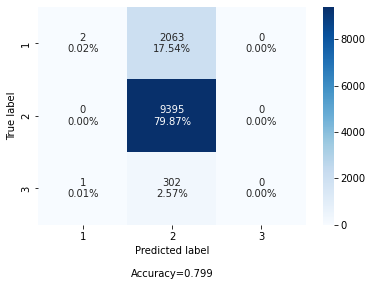

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['1', '2','3']
make_confusion_matrix(lr_matrix, 
                      group_names=labels,
                      categories=categories)

In [ ]:
print(metrics.classification_report(y_test_Original_Label, y_pred_lr_1, digits=3))

              precision    recall  f1-score   support

           1      0.667     0.001     0.002      2065
           2      0.799     1.000     0.888      9395
           3      0.000     0.000     0.000       303

    accuracy                          0.799     11763
   macro avg      0.489     0.334     0.297     11763
weighted avg      0.755     0.799     0.710     11763



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Gaussian Naive Bayes classifier

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_gnb = gnb.predict(X_test_Original_Label)

print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}'.format(gnb.score(X_test_Original_Label, y_test_Original_Label)))

Accuracy of Gaussian Naive Bayes classifier on test set: 0.99


In [ ]:
gnb_matrix = metrics.confusion_matrix(y_test_Original_Label, y_pred_gnb)

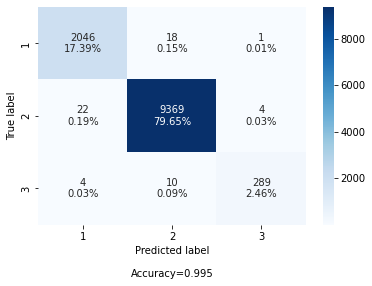

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['1', '2','3']
make_confusion_matrix(gnb_matrix, 
                      group_names=labels,
                      categories=categories)

In [ ]:
print(metrics.classification_report(y_test_Original_Label, y_pred_gnb, digits=3))

              precision    recall  f1-score   support

           1      0.987     0.991     0.989      2065
           2      0.997     0.997     0.997      9395
           3      0.983     0.954     0.968       303

    accuracy                          0.995     11763
   macro avg      0.989     0.981     0.985     11763
weighted avg      0.995     0.995     0.995     11763



## KNN Classifier

In [ ]:
#Setup a knn classifier with k neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(4)

knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred_knn = knn.predict(X_test_Original_Label)

print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test_Original_Label, y_test_Original_Label)))

Accuracy of KNN classifier on test set: 0.69


In [ ]:
knn_matrix = metrics.confusion_matrix(y_test_Original_Label, y_pred_knn)

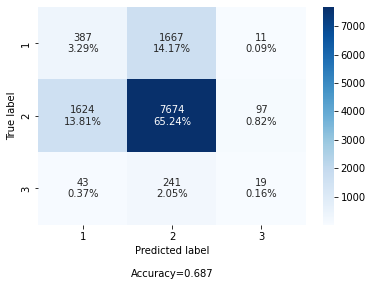

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['1', '2','3']
make_confusion_matrix(knn_matrix, 
                      group_names=labels,
                      categories=categories)

## SVM

In [ ]:
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
# Reference: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    #print('Model Performance')
    #print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    #print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid_svm = {
    'C': [1,10],
    'gamma': [1e-4, 1e-3],
    'kernel': ['linear'],
}
# Create a based model
svc = SVC()
# Instantiate the grid search model
svc_halving_cv = HalvingGridSearchCV(svc, param_grid_svm, verbose = 2, n_jobs=-1, cv=3)
svc_halving_cv.fit(X_train_scaled, y_train)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 13724
max_resources_: 41173
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 13724
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 1
n_candidates: 2
n_resources: 41172
Fitting 3 folds for each of 2 candidates, totalling 6 fits


HalvingGridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                    param_grid={'C': [1, 10], 'gamma': [0.0001, 0.001],
                                'kernel': ['linear']},
                    verbose=2)

In [ ]:
print("Best parmaters for SVM Classifier are:", svc_halving_cv.best_params_)

svc_best_grid = svc_halving_cv.best_estimator_
svc_grid_accuracy = evaluate(svc_best_grid, X_test_scaled_h1, y_test_Original_Label)

# base SVM model
svm = SVC()
svm.fit(X_train_scaled, y_train)
svc_base_accuracy = svm.score(X_test_scaled_h1, y_test_Original_Label)

print('Accuracy For SVM base model:', svc_base_accuracy)
print('Accuracy For SVM after Hyperparameter Tuning:', svc_grid_accuracy * 0.01)
print('Accuracy For SVM Improvement of {:0.2f}%.'.format((svc_grid_accuracy - svc_base_accuracy) / svc_base_accuracy))

Best parmaters for SVM Classifier are: {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
Accuracy For SVM base model: 0.9960044206409929
Accuracy For SVM after Hyperparameter Tuning: 0.9972796055428037
Accuracy For SVM Improvement of 99.13%.


In [ ]:
# base SVM model
svm = SVC()
svm.fit(X_train_scaled, y_train)
svc_base_accuracy = svm.score(X_test_scaled_h1, y_test_Original_Label)

print('Accuracy For SVM base model:', svc_base_accuracy)

Accuracy For SVM base model: 0.9960044206409929


In [ ]:
y_pred_svm_base = svm.predict(X_test_scaled_h1)
svm_base_f1 = metrics.f1_score(y_test_Original_Label, y_pred_svm_base, average='micro')
svm_base_f1


0.9960044206409929

In [ ]:
# F1 score comparison - SVM
from sklearn import metrics
#svm_base_f1 = metrics.f1_score(y_test, y_pred_svm_base, average='micro')
y_pred_svm_grid = svc_halving_cv.predict(X_test_scaled_h1)
svm_grid_f1 = metrics.f1_score(y_test_Original_Label, y_pred_svm_grid, average='micro')

#print('F1 Score For SVM base model:', svm_base_f1)
print('F1 Score For SVM after Hyperparameter Tuning:', svm_grid_f1)
print('F1 Score For SVM Improvement of {:0.2f}%.'.format((svm_grid_f1 - svm_base_f1) / svm_base_f1))

F1 Score For SVM after Hyperparameter Tuning: 0.9960044206409929
F1 Score For SVM Improvement of 0.00%.


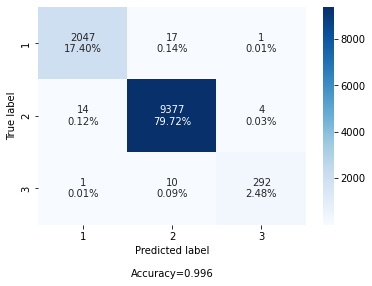

In [ ]:
svm_matrix_grid = metrics.confusion_matrix(y_test_Original_Label, y_pred_svm_grid)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['1', '2','3']
make_confusion_matrix(svm_matrix_grid, 
                      group_names=labels,
                      categories=categories)

In [ ]:
#y_pred_svm_grid2 = svc_halving_cv.predict(X_test_scaled_h1)


## Random Forest

In [ ]:
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [15, 20, 50]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          # cv = 3, n_jobs = -1, verbose = 2)
rf_halving_cv = HalvingGridSearchCV(rf, param_grid, scoring="roc_auc", verbose = 2, n_jobs=-1, cv=3)
rf_halving_cv.fit(X_train, y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 508
max_resources_: 41173
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 162
n_resources: 508
Fitting 3 folds for each of 162 candidates, totalling 486 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan na

----------
iter: 1
n_candidates: 54
n_resources: 1524
Fitting 3 folds for each of 54 candidates, totalling 162 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

----------
iter: 2
n_candidates: 18
n_resources: 4572
Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

----------
iter: 3
n_candidates: 6
n_resources: 13716
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

----------
iter: 4
n_candidates: 2
n_resources: 41148
Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

HalvingGridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                    param_grid={'bootstrap': [True], 'max_depth': [10, 20, 30],
                                'max_features': [2, 3],
                                'min_samples_leaf': [3, 4, 5],
                                'min_samples_split': [8, 10, 12],
                                'n_estimators': [15, 20, 50]},
                    scoring='roc_auc', verbose=2)

In [ ]:
from sklearn import metrics
print("Best parmaters for Random Forests are:", rf_halving_cv.best_params_)
rf_best_grid = rf_halving_cv.best_estimator_
rf_grid_accuracy = evaluate(rf_best_grid, X_test_Original_Label, y_test_Original_Label)

# base Random Forest model
rf_base_model = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf_base_model.fit(X_train, y_train)
rf_base_accuracy = evaluate(rf_base_model, X_test_Original_Label, y_test_Original_Label)

print('Accuracy For Random Forest base model:', rf_base_accuracy)
print('Accuracy For Random Forest after Hyperparameter Tuning:', rf_grid_accuracy)
print('Accuracy For Random Forest Improvement of {:0.2f}%.'.format(100 * (rf_grid_accuracy - rf_base_accuracy) / rf_base_accuracy))

Best parmaters for Random Forests are: {'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 15}
Accuracy For Random Forest base model: 99.40916432882769
Accuracy For Random Forest after Hyperparameter Tuning: 98.00787780894896
Accuracy For Random Forest Improvement of -1.41%.


In [ ]:
# F1 score comparison - Random Forest
from sklearn import metrics
y_pred_rf = rf_base_model.predict(X_test_Original_Label)
rf_base_f1 = metrics.f1_score(y_test_Original_Label, y_pred_rf, average = 'micro')
y_pred_rf_grid = rf_halving_cv.predict(X_test_Original_Label)
rf_grid_f1 = metrics.f1_score(y_test_Original_Label, y_pred_rf_grid, average = 'micro')

print('F1 Score For Random Forest base model:', rf_base_f1)
print('F1 Score For Random Forest after Hyperparameter Tuning:', rf_grid_f1)
print('F1 Score For Random Forest Improvement of {:0.2f}%.'.format(100 * (rf_grid_f1 - rf_base_f1) / rf_base_f1))

F1 Score For Random Forest base model: 0.9883533112301284
F1 Score For Random Forest after Hyperparameter Tuning: 0.9671002295332825
F1 Score For Random Forest Improvement of -2.15%.


In [ ]:
#y_pred_rf_grid2 = rf_halving_cv.predict(X_test_h1)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


## Feature Importance - dont run

Text(0.5, 1.0, 'Feature Importance Ranking')

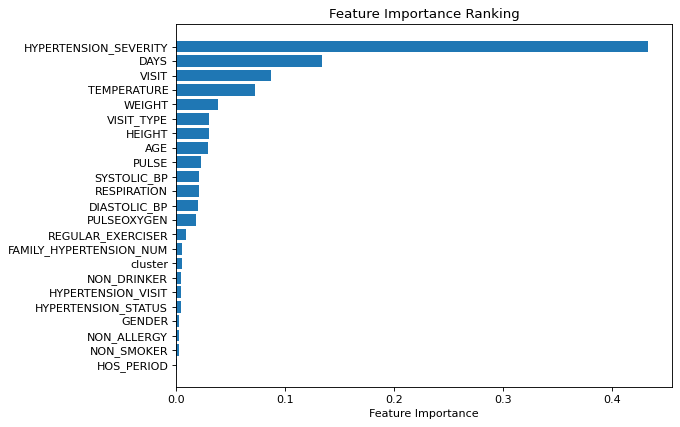

In [ ]:
# feature importance

from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

sort = rf_base_model.feature_importances_.argsort()
plt.barh(X_train_w_col.columns[sort], rf_base_model.feature_importances_[sort])
plt.xlabel("Feature Importance")
plt.title("Feature Importance Ranking")

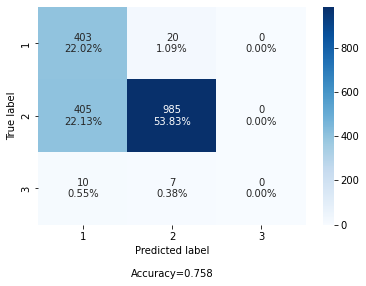

In [ ]:
rf_matrix_grid = metrics.confusion_matrix(y_test_Original_Label, y_pred_rf_grid)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['1', '2','3']
make_confusion_matrix(rf_matrix_grid, 
                      group_names=labels,
                      categories=categories)

## Summarize Metrics

In [ ]:
import scikitplot as skplt

import sklearn



In [ ]:
lr_probas = lr.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
gnb_probas = gnb.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)
knn_probas = knn.fit(X_train_scaled,y_train).predict_proba(X_test_scaled)
##et_scores = ExtraTreesClassifier().fit(X_cancer_train, Y_cancer_train).predict_proba(X_cancer_test)

probas_list = [lr_probas, gnb_probas, knn_probas]
clf_names = ['Logistic Regression', 'GNB', 'KNN']

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


F1

In [ ]:
#Logistric Regression
lr_f1= round(metrics.f1_score(y_test_Original_Label, y_pred_lr_1, average='micro'),2)

#GNB
gnb_f1 = round(metrics.f1_score(y_test_Original_Label, y_pred_gnb, average='micro'),2)

#knn
knn_f1 = round(metrics.f1_score(y_test_Original_Label, y_pred_knn, average='micro'),2)

#svm base for now due to the running time
svm_grid_f1 = round(metrics.f1_score(y_test_Original_Label, y_pred_svm_grid, average='micro') ,2)

#random forest
rf_grid_f1 = round(metrics.f1_score(y_test_Original_Label, y_pred_rf_grid, average = 'micro'),2)


In [ ]:
lr_f1

0.8

In [ ]:
f1_list = [lr_f1, gnb_f1, knn_f1,svm_grid_f1,rf_grid_f1]
clf_names = ['Logistic Regression', 'GNB', 'KNN','SVM','Random Forest']

In [ ]:
print(f1_list)

[0.8, 0.99, 0.69, 1.0, 0.97]


In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

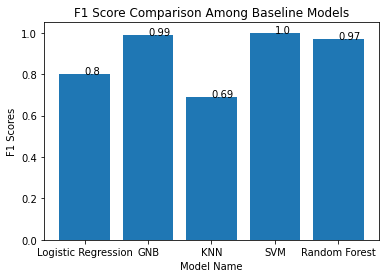

In [ ]:
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = clf_names
    y = f1_list
      
    # making the bar chart on the data
    plt.bar(x, y)
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving title to the plot
    plt.title("F1 Score Comparison Among Baseline Models")
      
    # giving X and Y labels
    plt.xlabel("Model Name")
    plt.ylabel("F1 Scores")
      
    # visualizing the plot
    plt.show()